In [ ]:
# Practica 5 Bias Variance
# Autor: Jaime del Rey, Grupo 24

In [222]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat

In [223]:
#Data
data = loadmat('ex5data1')

y = data['y']
x_data = data['X']
x = np.hstack((np.ones(np.shape(x_data)),x_data))

xval = data['Xval']
xval = np.hstack((np.ones(np.shape(xval)),xval))
yval = data['yval']

xtest = data['Xtest']
xtest = np.hstack((np.ones(np.shape(xtest)),xtest))
ytest = data['ytest']

x_T = x.T
xval_T = xval.T
xtest_T = xtest.T

In [317]:
#functions
def linear_regression_cost(theta,lmda,x,x_T,y):
    
    m = np.shape(y)[0]
    h = theta @ x_T
    h_T = np.matrix(h).T
    a = np.sum(np.power((h_T - y),2))
    
    cost = ((1/(2*m)) * a) + ((lmda/(2*m))*(np.sum(np.power(theta[1:],2))))
    return cost

def linear_regression_gradient(theta,lmda,x,x_T,y):

    m = np.shape(y)[0]
    h = theta @ x_T
    h_T = np.matrix(h).T
    g= ((1/m) * ((h_T - y).T @ x).T) + ((lmda/m) * np.vstack((np.zeros(1),np.matrix(theta[1:]).T)))

    return np.asarray(g).ravel()

def fit(theta,l,x,x_T,y):

    res = opt.minimize(linear_regression_cost,x0=theta,args=(l,x,x_T,y),jac=linear_regression_gradient)
    return res

303.9931922202643
[-15.30301567 598.25074417]
      fun: 22.373906495108915
 hess_inv: array([[1.0297299 , 0.00612422],
       [0.00612422, 0.00121324]])
      jac: array([1.48804385e-08, 3.97027009e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([13.08790353,  0.36777923])
[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.]
 [-50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37.
  -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23.
  -22. -21. -20. -19. 

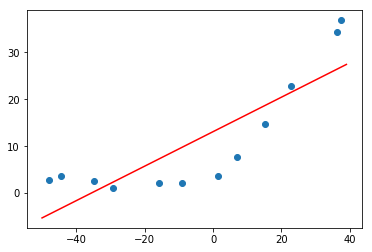

In [268]:
#Comprobaciones de la regresion
cost = linear_regression_cost([1,1],1,x,x_T,y)
guess = linear_regression_gradient([1,1],1,x,x_T,y)
print(cost)
print(guess)

## Grafica
res = fit([1,1],0,x,x_T,y)
print(res)
h = np.vstack((np.ones(90),range(-50,40,1)))
print(h)
h = np.array(res['x'] @ h)
h = h.tolist()

plt.figure()
plt.scatter(x_data,y)
plt.plot(range(-50,40,1),h,'-r')
plt.show()

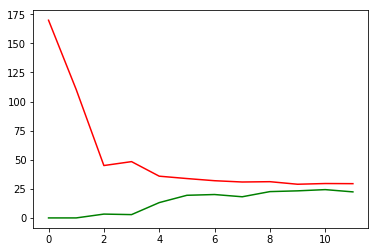

In [295]:
#Learning curves
def learning_curve(x,x_T,y,train,train_T,ytrain,l):

    trainlist = []
    validation = []
    theta = np.ones(np.shape(x)[1])

    for i in np.arange(1,len(y)+1):
        res = fit(theta,l,x[0:i,:],x_T[:,0:i],y[0:i,:])
        trainlist.append(linear_regression_cost(res['x'],l,x[0:i,:],x_T[:,0:i],y[0:i,:]))
        validation.append(linear_regression_cost(res['x'],l, train, train_T, ytrain))

    plt.plot(range(0,len(y),1),trainlist,'-g')
    plt.plot(range(0,len(y),1),validation,'-r')
    plt.show()
    
learning_curve(x,x_T,y,xval,xval_T,yval,0)

In [296]:
#Polinomial regression
def create_polinomial_features(x,p):
    #add extra comlumns
    extra = np.ones((np.shape(x)[0],(p-1)))
    x=np.append(x,extra,axis=1)
    
    #Get polinomial columns
    for i in range(0,p):
        x[:,i] = np.power(x[:,0],i+1)

    return x
    
def normalize_matrix(x): 
    #Calculations per column
    mean = np.mean(x,0)
    std = np.std(x,0)

    x = np.subtract(x, np.matrix(mean))
    x = np.true_divide(x, np.matrix(std))
    
    return x

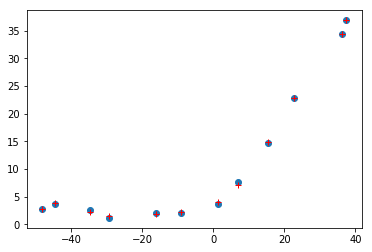

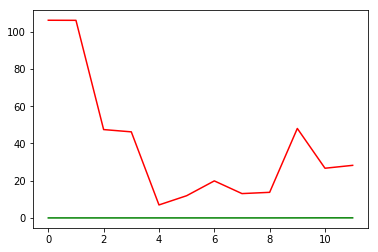

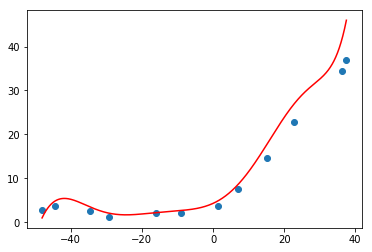

In [297]:
#POLINOMIAL FEATURES
p = 8
theta = np.ones(p+1)

#CHECK THE NEW FUNCTIONS AND TRAIN
#create polinomial features p = 8
x_pol = create_polinomial_features(x_data,p)
#normalize features
x_norm = normalize_matrix(x_pol)
#insert ones
ones = np.ones(np.shape(x_norm)[0])
x_norm = np.hstack((np.matrix(ones).T, x_norm))

#fit the model and get cost
res = fit(theta,0,x_norm,x_norm.T,y)

h = np.array(res['x'] @ x_norm.T)[0]
plt.figure()
plt.scatter(x_data,y)
plt.plot(x_data,h.T,'+r')
plt.show()

#LEARNING CURVE
#transform xval
xval_pol = create_polinomial_features(data['Xval'],p)
#normalize features
xval_norm = normalize_matrix(xval_pol)
#insert ones
ones = np.ones(np.shape(xval_norm)[0])
xval_norm = np.hstack((np.matrix(ones).T, xval_norm))

learning_curve(x_norm,x_norm.T,y,xval_norm,xval_norm.T,yval,0)

#PLOT MORE VALUES
#graphics
h = np.arange(np.min(x_data),np.max(x_data),0.05)
h_pol = create_polinomial_features(h[:,np.newaxis],p)
h_norm = normalize_matrix(h_pol)
ones = np.ones(np.shape(h_norm)[0])
h_norm = np.hstack((np.matrix(ones).T, h_norm))
h = np.array(res['x'] @ h_norm.T)[0]

plt.figure()
plt.scatter(x_data,y)
plt.plot(np.arange(np.min(x_data),np.max(x_data),0.05),h,'-r')
plt.show()


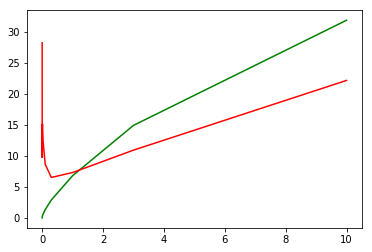

In [319]:
#LAMBDA SELECTION
validation = []
train = []
lam = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]

#transform x
x_pol = create_polinomial_features(x_data,p)
#normalize features
x_norm = normalize_matrix(x_pol)
#insert ones
ones = np.ones(np.shape(x_norm)[0])
x_norm = np.hstack((np.matrix(ones).T, x_norm))

#transform xval
xval_pol = create_polinomial_features(data['Xval'],p)
#normalize features
xval_norm = normalize_matrix(xval_pol)
#insert ones
ones = np.ones(np.shape(xval_norm)[0])
xval_norm = np.hstack((np.matrix(ones).T, xval_norm))

#transform xtest
xtest_pol = create_polinomial_features(data['Xtest'],p)
#normalize features
xtest_norm = normalize_matrix(xtest_pol)
#insert ones
ones = np.ones(np.shape(xtest_norm)[0])
xtest_norm = np.hstack((np.matrix(ones).T, xtest_norm))

#fit the model and get cost
theta = np.ones(p+1)

for l in lam:
    res = fit(theta,l,x_norm,x_norm.T,y)
    train.append(linear_regression_cost(res['x'],l, x_norm, x_norm.T, y))
    validation.append(linear_regression_cost(res['x'],l, xval_norm, xval_norm.T, yval))

plt.plot(lam,train,'-g')
plt.plot(lam,validation,'-r')
plt.show()

In [320]:
res = fit(theta,3,x_norm,x_norm.T,y)
print(linear_regression_cost(res['x'],3, xtest_norm, xtest_norm.T, ytest))

17.720340412318546
